In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import jovian
import seaborn as sns

&lt;IPython.core.display.Javascript object&gt;

# Population Analysis
### Every day a child is born and people are also lost. The details below shows the population of a country or region in relation to the land the region posses, the density/spread of the poppulation and so on.

In [2]:
population=pd.read_csv('./data/population_by_country_2020.csv')
population
location=pd.read_csv('./data/locations.csv')
location.rename(columns={'location':'Country (or dependency)'},inplace=True)
location= location.drop(['population'], axis=1)
population_location=location.merge(population,on='Country (or dependency)')
population_location['gdp']=population_location['gdp_per_capita']*population_location['Population (2020)']
population_location.describe()

,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),gdp
count,190.000000,156.000000,170.000000,1.900000e+02,1.900000e+02,190.000000,1.900000e+02,174.000000,1.700000e+02
mean,73.577000,2.982487,20036.805118,4.017652e+07,4.076023e+05,407.315789,6.664994e+05,27.821839,6.888455e+11
std,7.606313,2.494938,20232.073634,1.495488e+08,1.230787e+06,2076.474089,1.852656e+06,132533.000962,2.354154e+12
min,53.280000,0.100000,661.240000,3.497000e+03,-3.838400e+05,0.000000,1.000000e+00,-653249.000000,6.966469e+08
25%,68.210000,1.275000,4626.697750,2.001536e+06,1.248500e+03,32.500000,2.290250e+04,-15709.250000,2.587349e+10
50%,75.070000,2.310000,13680.498000,8.704799e+06,6.061500e+04,88.000000,1.165500e+05,-826.000000,8.288990e+10
75%,79.035000,3.845250,29301.706750,2.902429e+07,3.612128e+05,222.000000,5.237000e+05,11327.500000,4.321078e+11
max,86.750000,13.800000,116935.600000,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000,2.204910e+13


In [3]:
population_location.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 190 entries, 0 to 189
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country (or dependency)     190 non-null    object 
 1   continent                   190 non-null    object 
 2   life_expectancy             190 non-null    float64
 3   hospital_beds_per_thousand  156 non-null    float64
 4   gdp_per_capita              170 non-null    float64
 5   Population (2020)           190 non-null    int64  
 6   Yearly Change               190 non-null    object 
 7   Net Change                  190 non-null    int64  
 8   Density (P/Km²)             190 non-null    int64  
 9   Land Area (Km²)             190 non-null    int64  
 10  Migrants (net)              174 non-null    float64
 11  Fert. Rate                  190 non-null    object 
 12  Med. Age                    190 non-null    object 
 13  Urban Pop %          

### The numbers in the data type 'object' have to converted to 'int' or 'float' for numerical computations. First the % is removed using '.replace'. The function 'pd.to_numeric' then converts the 'number objects' to numericals.

In [4]:
population_location['Urban Pop(%)']=population_location['Urban Pop %'].str.replace('%','')
population_location['Urban Pop(%)']=pd.to_numeric(population_location['Urban Pop(%)'],errors='coerce')
population_location=population_location.drop('Urban Pop %', axis=1)

population_location['Yearly Change(%)']=population_location['Yearly Change'].str.replace('%','')
population_location['Yearly Change(%)']=pd.to_numeric(population_location['Yearly Change(%)'])
population_location=population_location.drop('Yearly Change', axis=1)

population_location['Fert. Rate']=pd.to_numeric(population_location['Fert. Rate'],errors='coerce')
population_location['Med. Age']=pd.to_numeric(population_location['Med. Age'],errors='coerce')

population_location['World Share']=population_location['World Share'].str.replace('%','')
population_location['World Share']=pd.to_numeric(population_location['World Share'],errors='coerce')

In [5]:
population_location=population_location.drop('gdp_per_capita', axis=1)
population_location= population_location.drop('hospital_beds_per_thousand', axis=1)

In [6]:
population_location.describe()

,life_expectancy,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,World Share,gdp,Urban Pop(%),Yearly Change(%)
count,190.000000,1.900000e+02,1.900000e+02,190.000000,1.900000e+02,174.000000,174.000000,174.000000,190.000000,1.700000e+02,182.000000,190.000000
mean,73.577000,4.017652e+07,4.076023e+05,407.315789,6.664994e+05,27.821839,2.649425,30.793103,0.514526,6.888455e+11,60.428571,1.134789
std,7.606313,1.495488e+08,1.230787e+06,2076.474089,1.852656e+06,132533.000962,1.271236,9.019744,1.916252,2.354154e+12,22.502127,1.096525
min,53.280000,3.497000e+03,-3.838400e+05,0.000000,1.000000e+00,-653249.000000,1.100000,15.000000,0.000000,6.966469e+08,10.000000,-2.470000
25%,68.210000,2.001536e+06,1.248500e+03,32.500000,2.290250e+04,-15709.250000,1.700000,23.000000,0.030000,2.587349e+10,43.000000,0.327500
50%,75.070000,8.704799e+06,6.061500e+04,88.000000,1.165500e+05,-826.000000,2.200000,30.500000,0.110000,8.288990e+10,62.500000,0.995000
75%,79.035000,2.902429e+07,3.612128e+05,222.000000,5.237000e+05,11327.500000,3.375000,38.750000,0.367500,4.321078e+11,79.000000,1.860000
max,86.750000,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,18.470000,2.204910e+13,98.000000,3.840000


In [7]:
population_location.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 190 entries, 0 to 189
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  190 non-null    object 
 1   continent                190 non-null    object 
 2   life_expectancy          190 non-null    float64
 3   Population (2020)        190 non-null    int64  
 4   Net Change               190 non-null    int64  
 5   Density (P/Km²)          190 non-null    int64  
 6   Land Area (Km²)          190 non-null    int64  
 7   Migrants (net)           174 non-null    float64
 8   Fert. Rate               174 non-null    float64
 9   Med. Age                 174 non-null    float64
 10  World Share              190 non-null    float64
 11  gdp                      170 non-null    float64
 12  Urban Pop(%)             182 non-null    float64
 13  Yearly Change(%)         190 non-null    float64
dtypes: float64(8

In [8]:
population_location['Population Yearly']= population_location['Population (2020)']-((population_location['Yearly Change(%)']/100)*population_location['Population (2020)'])
population_location #This formula was used in calculating the yearly population using the yearly change.

,Country (or dependency),continent,life_expectancy,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,World Share,gdp,Urban Pop(%),Yearly Change(%),Population Yearly
0,Afghanistan,Asia,64.83,39074280,886592,60,652860,-62920.0,4.6,18.0,0.50,7.048949e+10,25.0,2.33,3.816385e+07
1,Albania,Europe,78.57,2877239,-3120,105,27400,-14000.0,1.6,36.0,0.04,3.396129e+10,63.0,-0.11,2.880404e+06
2,Algeria,Africa,76.88,43984569,797990,18,2381740,-10000.0,3.1,29.0,0.56,6.119942e+11,73.0,1.85,4.317085e+07
3,Andorra,Europe,83.73,77287,123,164,470,NaN,NaN,NaN,0.00,NaN,88.0,0.16,7.716334e+04
4,Angola,Africa,61.15,33032075,1040977,26,1246700,6413.0,5.6,17.0,0.42,1.922300e+11,67.0,3.27,3.195193e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Vietnam,Asia,75.40,97490013,876473,314,310070,-80000.0,2.1,32.0,1.25,6.016971e+11,38.0,0.91,9.660285e+07
186,Western Sahara,Africa,70.26,599769,14876,2,266000,5582.0,2.4,28.0,0.01,NaN,87.0,2.55,5.844749e+05
187,Yemen,Asia,66.12,29935468,664042,56,527970,-30000.0,3.8,20.0,0.38,4.427896e+10,38.0,2.28,2.925294e+07
188,Zambia,Africa,63.89,18468257,522925,25,743390,-8000.0,4.7,18.0,0.24,6.813404e+10,45.0,2.93,1.792714e+07


In [9]:
total_population_2020= population_location['Population (2020)'].sum()
average_life=population_location['Population (2020)']*population_location['life_expectancy']/total_population_2020
world_life_expectancy=average_life.sum().round()
print('From the dataset, the total population is {} people, with an average life expectancy of {} years.'.format(total_population_2020, world_life_expectancy))

From the dataset, the total population is 7633538221 people, with an average life expectancy of 73.0 years.


## The top 10 most populated countries are:

In [10]:
top_10_populated=population_location.sort_values('Population (2020)',ascending=False).head(10)

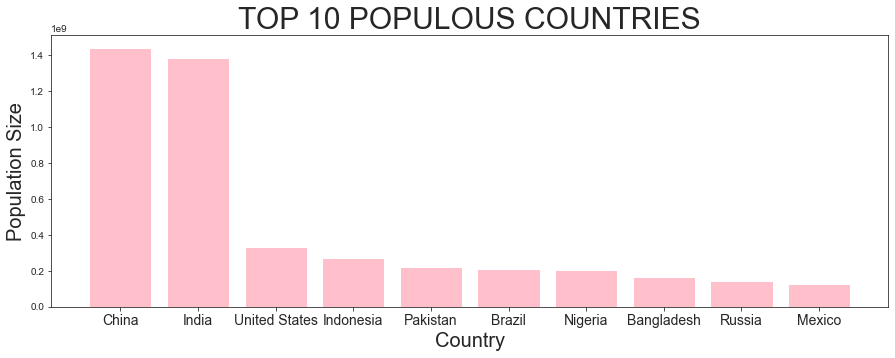

In [11]:
sns.set_style('ticks')
plt.figure(figsize=(15,5))
plt.bar(x= top_10_populated['Country (or dependency)'], height=top_10_populated['Population (2020)'],color='pink')
plt.xticks(fontsize=14)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Population Size',fontsize=20)
plt.title('TOP 10 POPULOUS COUNTRIES', fontsize=30);

## Top 10 countries with the highest fertile rate are:

The 5 most fertile countries in the world in descending order are: Niger,Somalia,Mali,Chad,Angola,Burundi,Nigeria,Gambia,Burkina Faso,Uganda .


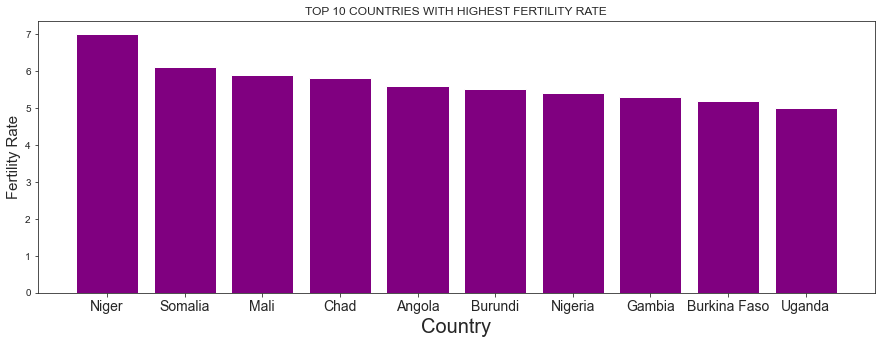

In [12]:
most_fertile=population_location.groupby('Country (or dependency)')[['Fert. Rate','life_expectancy','Population (2020)']].sum().sort_values(['Fert. Rate'], ascending=False).head(10)
print('The 5 most fertile countries in the world in descending order are:',','.join(most_fertile.index.values),'.')
plt.figure(figsize=(15,5))
plt.xlabel('Country', fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Fertility Rate', fontsize=15)
plt.title('TOP 10 COUNTRIES WITH HIGHEST FERTILITY RATE')
plt.bar(most_fertile.index,most_fertile['Fert. Rate'], color='purple');

## Average Fertile Per Continent:

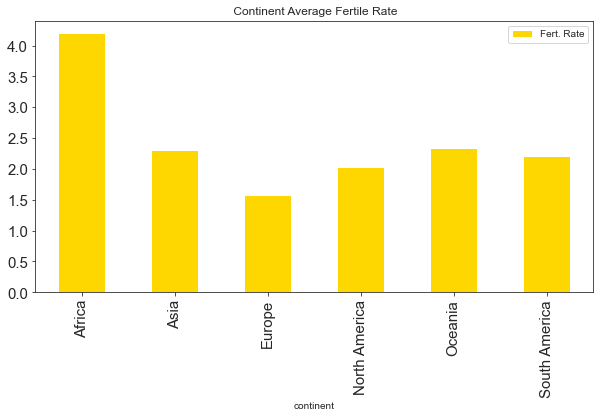

In [13]:
mean_fertility_per_continent= population_location.groupby('continent')[['Fert. Rate']].mean()
mean_fertility_per_continent.plot(kind='bar', figsize=(10,5), fontsize=15, color='gold', title= ' Continent Average Fertile Rate');

In [14]:
population_location

,Country (or dependency),continent,life_expectancy,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,World Share,gdp,Urban Pop(%),Yearly Change(%),Population Yearly
0,Afghanistan,Asia,64.83,39074280,886592,60,652860,-62920.0,4.6,18.0,0.50,7.048949e+10,25.0,2.33,3.816385e+07
1,Albania,Europe,78.57,2877239,-3120,105,27400,-14000.0,1.6,36.0,0.04,3.396129e+10,63.0,-0.11,2.880404e+06
2,Algeria,Africa,76.88,43984569,797990,18,2381740,-10000.0,3.1,29.0,0.56,6.119942e+11,73.0,1.85,4.317085e+07
3,Andorra,Europe,83.73,77287,123,164,470,NaN,NaN,NaN,0.00,NaN,88.0,0.16,7.716334e+04
4,Angola,Africa,61.15,33032075,1040977,26,1246700,6413.0,5.6,17.0,0.42,1.922300e+11,67.0,3.27,3.195193e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Vietnam,Asia,75.40,97490013,876473,314,310070,-80000.0,2.1,32.0,1.25,6.016971e+11,38.0,0.91,9.660285e+07
186,Western Sahara,Africa,70.26,599769,14876,2,266000,5582.0,2.4,28.0,0.01,NaN,87.0,2.55,5.844749e+05
187,Yemen,Asia,66.12,29935468,664042,56,527970,-30000.0,3.8,20.0,0.38,4.427896e+10,38.0,2.28,2.925294e+07
188,Zambia,Africa,63.89,18468257,522925,25,743390,-8000.0,4.7,18.0,0.24,6.813404e+10,45.0,2.93,1.792714e+07


## The most populated continents with their gdp in descending order are:
### The bar graph below shows the continents with the most population in desending order of appearance and the gdp values represented by the bars.

In [15]:
continent_population= population_location.groupby('continent')[['Population (2020)','gdp']].sum().sort_values(['Population (2020)','gdp'],ascending= False)

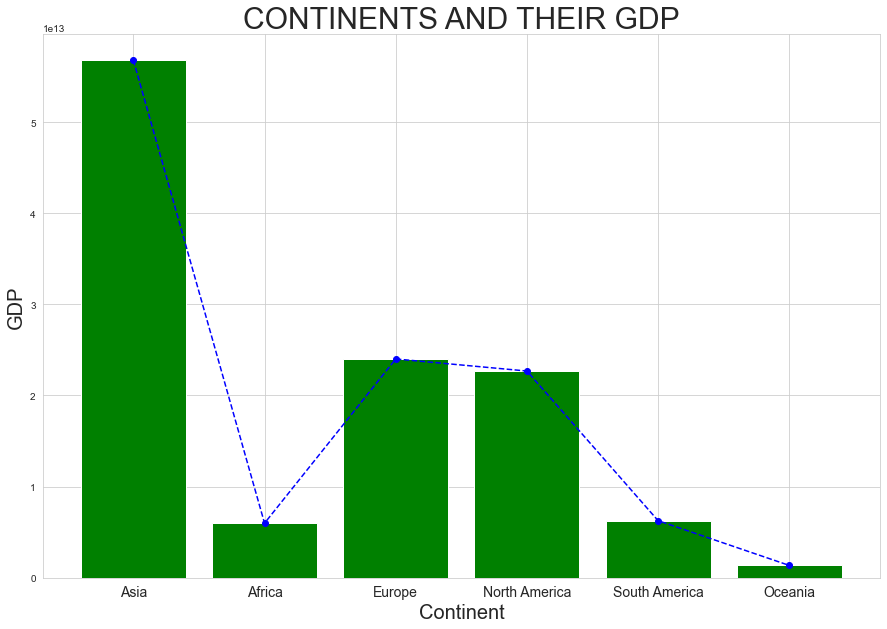

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.bar(continent_population.index, height= continent_population['gdp'],color='green')
plt.plot(continent_population.index,continent_population['gdp'],'o--b')
plt.xticks(fontsize=14)
plt.xlabel('Continent',fontsize=20)
plt.ylabel('GDP',fontsize=20)
plt.title('CONTINENTS AND THEIR GDP', fontsize=30);

## Q1: Which 10 countries have more of a rural settlement than an urban settlement?

In [17]:
higher_rural_settlement=population_location.sort_values('Urban Pop(%)').head(10)
mainly_rural_settlements=higher_rural_settlement.groupby('Country (or dependency)')[['Urban Pop(%)']].sum()
print('The 10 major countries which have more of a rural settlement than an Urban settlement are:',','.join(mainly_rural_settlements.index),'.')

The 10 major countries which have more of a rural settlement than an Urban settlement are: Burundi,Ethiopia,Liechtenstein,Malawi,Montserrat,Niger,Papua New Guinea,Rwanda,Saint Lucia,Sri Lanka .


## Q2: Which country the most emigrants?
### If people leaving the country are represented by a negative number, the countries with more emmigrants are:

In [18]:
most_emigrants=population_location.sort_values('Migrants (net)').head(10)
answer= most_emigrants['Country (or dependency)'].iloc[0]
answer
print('The country with the most number of emigrants is:',answer)

The country with the most number of emigrants is: Venezuela


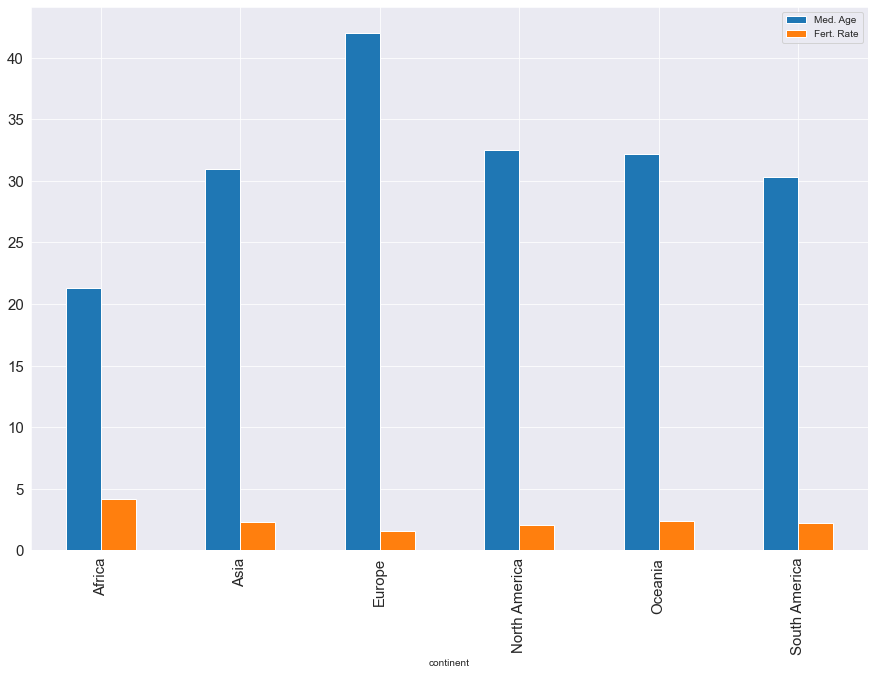

In [19]:
continent_fert_med_age=population_location.groupby('continent')[['Med. Age','Fert. Rate']].mean()
continent_fert_med_age
sns.set_style('darkgrid')
continent_fert_med_age.plot(kind='bar',figsize=(15,10),fontsize=15);

## Q3: Does Fertility rate impact the population?

In [20]:
most_fertile_with_low_med_age=(population_location.groupby('Country (or dependency)')[['Med. Age','Fert. Rate','Population (2020)']].sum()).sort_values(['Fert. Rate'and'Population (2020)'],ascending=False).head(10)
most_fertile_with_low_med_age


,Med. Age,Fert. Rate,Population (2020)
Country (or dependency),,,
China,38.0,1.7,1440297825
India,28.0,2.2,1382345085
United States,38.0,1.8,331341050
Indonesia,30.0,2.3,274021604
Pakistan,23.0,3.6,221612785
Brazil,33.0,1.7,212821986
Nigeria,18.0,5.4,206984347
Bangladesh,28.0,2.1,164972348
Russia,40.0,1.8,145945524


In [21]:
print('The data frame above shows that the fertility rate has no impact on the total population.')

The data frame above shows that the fertility rate has no impact on the total population.


## Q4: Which 10 countries are densely populated?

In [22]:
densely_populated= population_location.groupby('Country (or dependency)')[['Density (P/Km²)','Land Area (Km²)']].sum()
densely_populated_countries= densely_populated.sort_values('Density (P/Km²)',ascending= False).head(10)
print('The 10 most densely populated countries are: ',','.join(densely_populated_countries.index) ,'.')

The 10 most densely populated countries are:  Monaco,Singapore,Hong Kong,Gibraltar,Bahrain,Maldives,Malta,Bangladesh,Bermuda,Taiwan .


## Q5: Which 10 countries have the most world share?

In [23]:
high_world_share=population_location.groupby('Country (or dependency)')[['World Share','Population Yearly']].sum().sort_values('World Share',ascending=False).head(10)
high_world_share

,World Share,Population Yearly
Country (or dependency),,
China,18.47,1.434681e+09
India,17.70,1.368660e+09
United States,4.25,3.293861e+08
Indonesia,3.51,2.710896e+08
Pakistan,2.83,2.171805e+08
Brazil,2.73,2.112897e+08
Nigeria,2.64,2.016442e+08
Bangladesh,2.11,1.633061e+08
Russia,1.87,1.458871e+08


## From the analysis above, the following were observed:
* Majority of the populous countries are mainly located in Asia.
*The average life expectancy is 73 years.
* The continent with the lowest GDP is Africa.
* As the median age increased, the fertility rate dropped.
* Although the fertility rate may drop with age, it has no overall impact on the total population, probably due to an increase in immigrants.
* Countries that have a higher rural settlement have lower population density.
* The country with the most emigrants is Venezuela, this is probably due to the economical crisis being faced within the country.
* The top 10 countries with high world share also have a high population.

## Helpful Links:
1.https://stackoverflow.com/
2.https://matplotlib.org/3.3.1/


In [24]:
jovian.commit(project='population-course-project', environment=None)

&lt;IPython.core.display.Javascript object&gt;

[jovian] Attempting to save notebook..
[jovian] Error: Failed to detect notebook filename. Please provide the correct notebook filename as the &quot;filename&quot; argument to &quot;jovian.commit&quot;.
